In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
#Read in the csv file and convert to a Pandas dataframe
df_Football_Players = pd.read_csv("data/final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
df_Football_Players.shape

(10754, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [5]:
df_Football_Players.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [6]:
df_Football_Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [8]:
df_Football_Players.describe(include='object')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


In [9]:
df_Football_Players.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [ ]:
# Data from kaggle page and it's Reliabe

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
# Data is exist for 2 season 2021-2022 and 2022-2023

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [ ]:
# It's Consistenc

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [11]:
df_Football_Players.duplicated().sum()

0

In [15]:
df_Football_Players[['name','team']].duplicated().sum()

0

In [66]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [1]:
#Display number missing values per column

In [16]:
df_Football_Players.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [68]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [17]:
# check columns types 
df_Football_Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [18]:
df_Football_Players['winger'].value_counts()

winger
0    7447
1    3307
Name: count, dtype: int64

In [21]:
df_Football_Players['clean sheets'].value_counts()

clean sheets
0.000000     9800
0.500000       33
0.333333       23
0.250000       19
1.000000       16
             ... 
0.410865        1
0.203046        1
10.588235       1
0.065598        1
0.254902        1
Name: count, Length: 635, dtype: int64

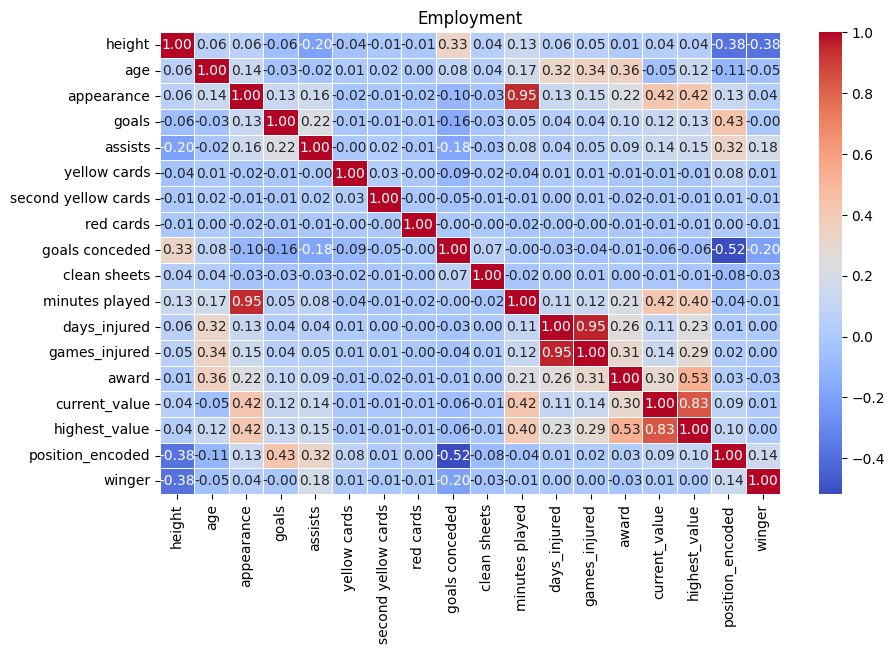

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_Football_Players.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Employment")
plt.show()

In [33]:
# go to clean them 

In [3]:
# check outliers 

In [23]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

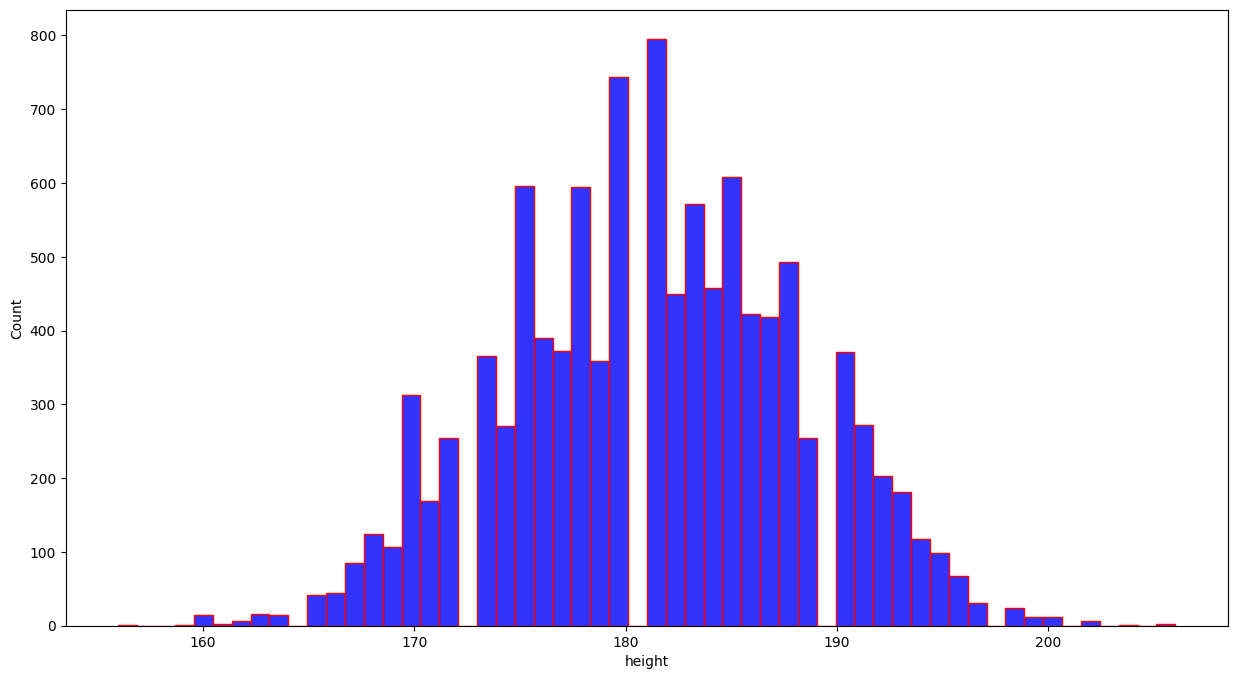

In [22]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='height',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

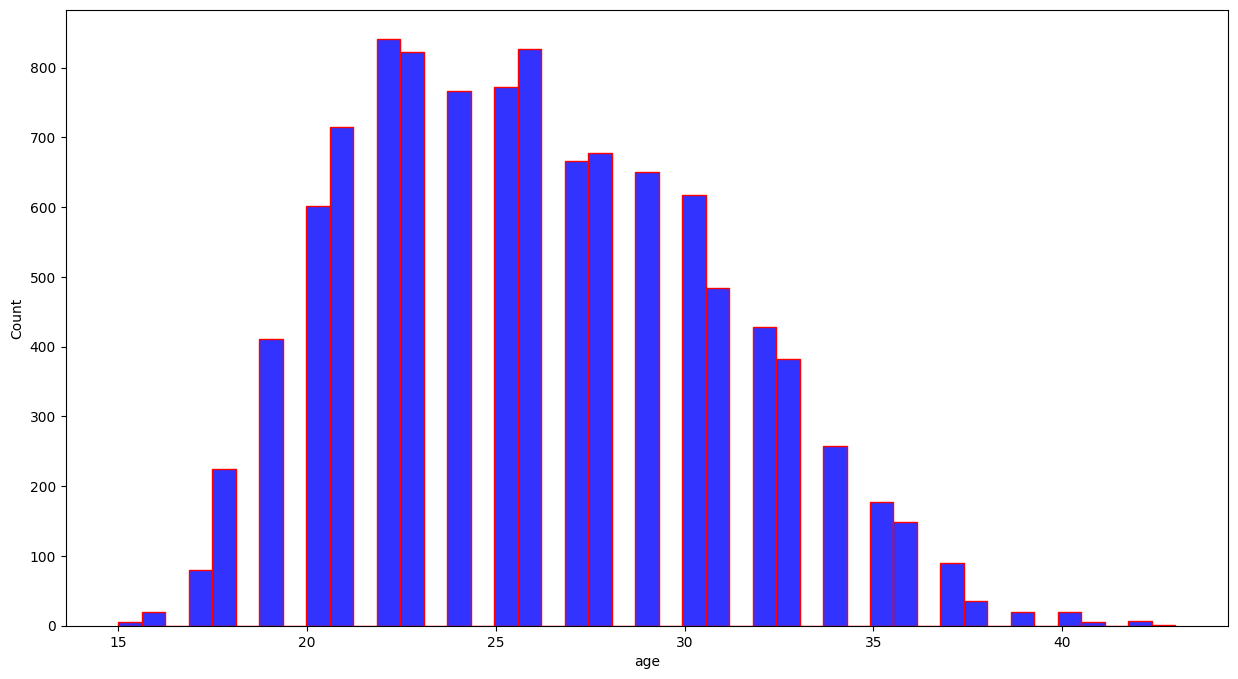

In [25]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='age',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

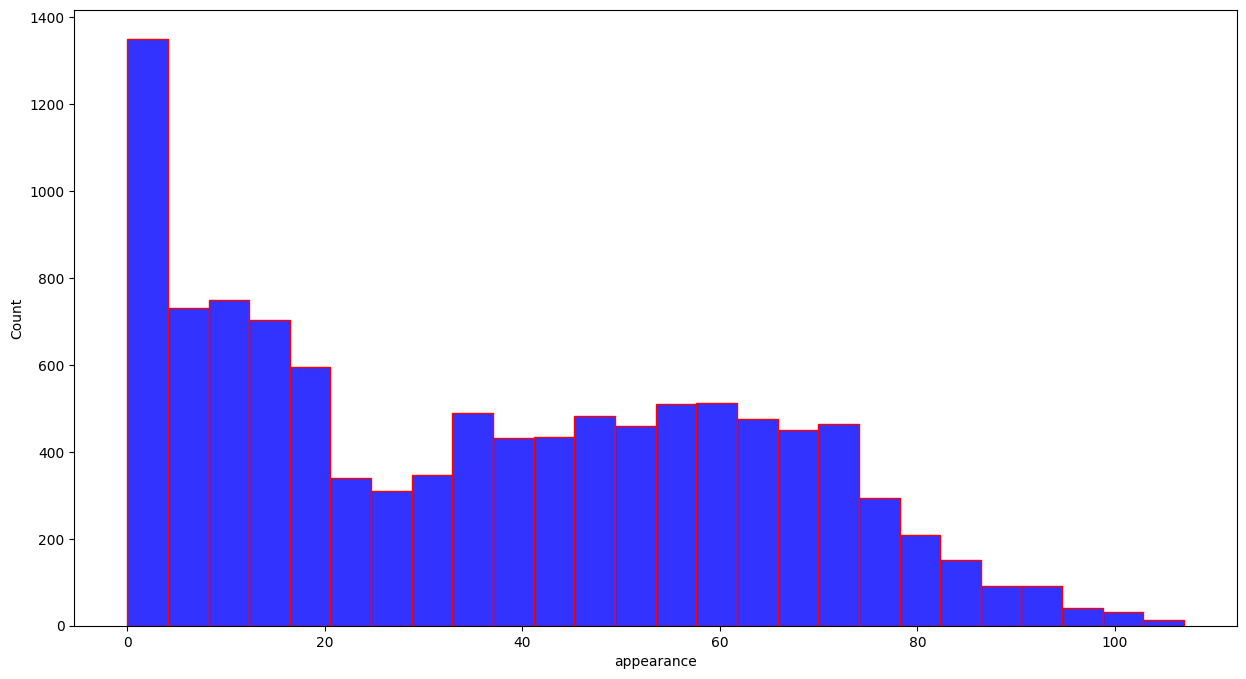

In [33]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='appearance',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

In [43]:
import scipy.stats as stats

# Compute Z-scores for the "appearance" column
df_Football_Players["z_score"] = stats.zscore(df_Football_Players["appearance"])

# Identify outliers (|Z| > 3)
df_Football_Players[df_Football_Players["z_score"].abs() > 3]


# It's looks there is no outlier 

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,z_score


In [44]:
del df_Football_Players["z_score"]

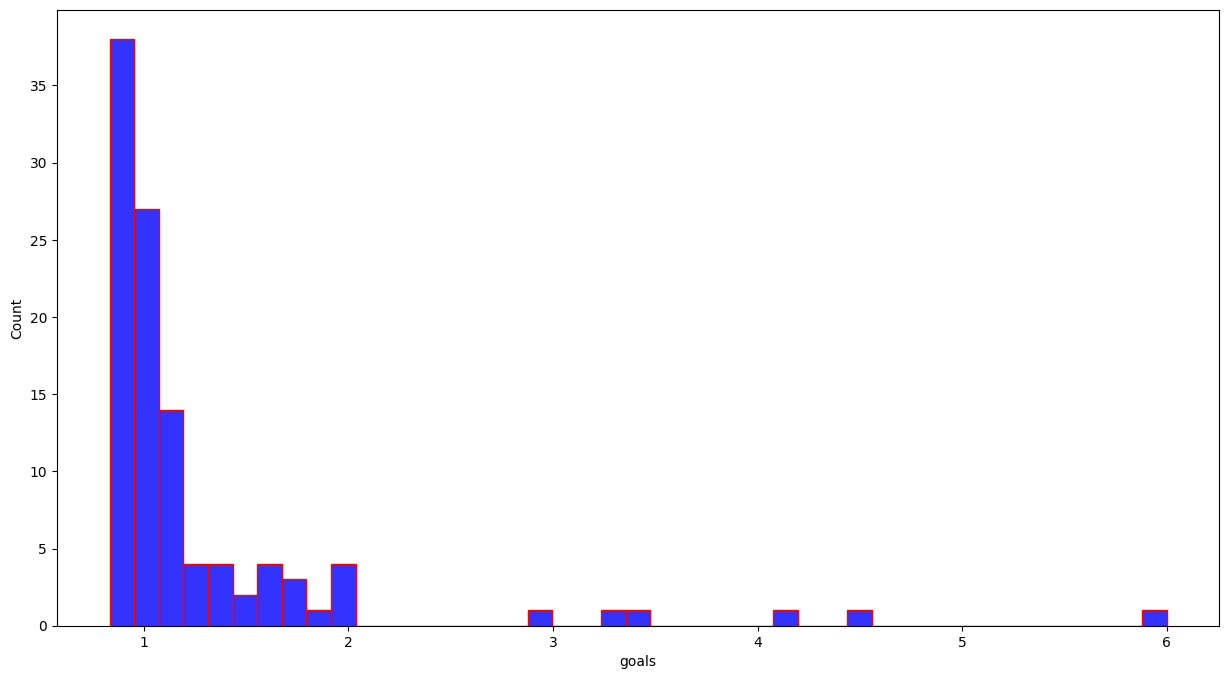

In [48]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players[(df_Football_Players['goals'] > 0.832830) & (df_Football_Players['goals'] < 11.250000)],
    x='goals',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

In [47]:
# Compute Z-scores for the "appearance" column
df_Football_Players["g_z_score"] = stats.zscore(df_Football_Players["goals"])

# Identify outliers (|Z| > 3)
df_Football_Players[df_Football_Players["g_z_score"].abs() > 3].sort_values('goals')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,g_z_score
6299,/enner-valencia/profil/spieler/139503,Fenerbahce,Enner Valencia,Attack Centre-Forward,177.000000,33.0,81,0.832830,0.217260,0.108630,...,0.0,4971,287,44,11,3800000,11000000,4,0,3.002350
6110,/emre-gokay/profil/spieler/1032864,Sivasspor,Emre Gökay,Attack-RightWinger,181.000000,17.0,4,0.833333,0.000000,0.000000,...,0.0,108,0,0,0,250000,250000,4,1,3.004484
8203,/lucas-beltran/profil/spieler/628366,CA River Plate,Lucas Beltrán,Attack Centre-Forward,176.000000,22.0,18,0.835267,0.208817,0.000000,...,0.0,862,12,1,1,6000000,6000000,4,0,3.012692
6329,/bafetimbi-gomis/profil/spieler/22388,Galatasaray,Bafétimbi Gomis,Attack Centre-Forward,184.000000,37.0,63,0.837488,0.089731,0.209372,...,0.0,3009,56,9,17,650000,14000000,4,0,3.022119
759,/justin-diehl/profil/spieler/720162,1.FC Köln,Justin Diehl,Attack-SecondStriker,174.000000,18.0,34,0.840764,0.191083,0.152866,...,0.0,2355,0,0,1,500000,500000,4,0,3.036029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8843,/hiroya-matsumoto/profil/spieler/571330,Sanfrecce Hiroshima,Hiroya Matsumoto,midfield-DefensiveMidfield,180.000000,22.0,1,3.461538,0.000000,0.000000,...,0.0,26,42,8,0,450000,450000,3,0,14.161076
7596,/jose-sand/profil/spieler/26269,Club Atlético Lanús,José Sand,Attack Centre-Forward,182.000000,42.0,6,4.090909,0.000000,0.000000,...,0.0,44,0,0,3,100000,4500000,4,0,16.832721
8547,/hidetaka-maie/profil/spieler/910473,Kashiwa Reysol,Hidetaka Maie,Attack Centre-Forward,187.000000,19.0,1,4.500000,0.000000,0.000000,...,0.0,60,0,0,0,125000,125000,4,0,18.569291
3799,/junior-moraes/profil/spieler/52915,Sport Club Corinthians Paulista,Júnior Moraes,Attack Centre-Forward,176.000000,36.0,1,6.000000,0.000000,0.000000,...,0.0,15,599,84,8,400000,5000000,4,0,24.936711


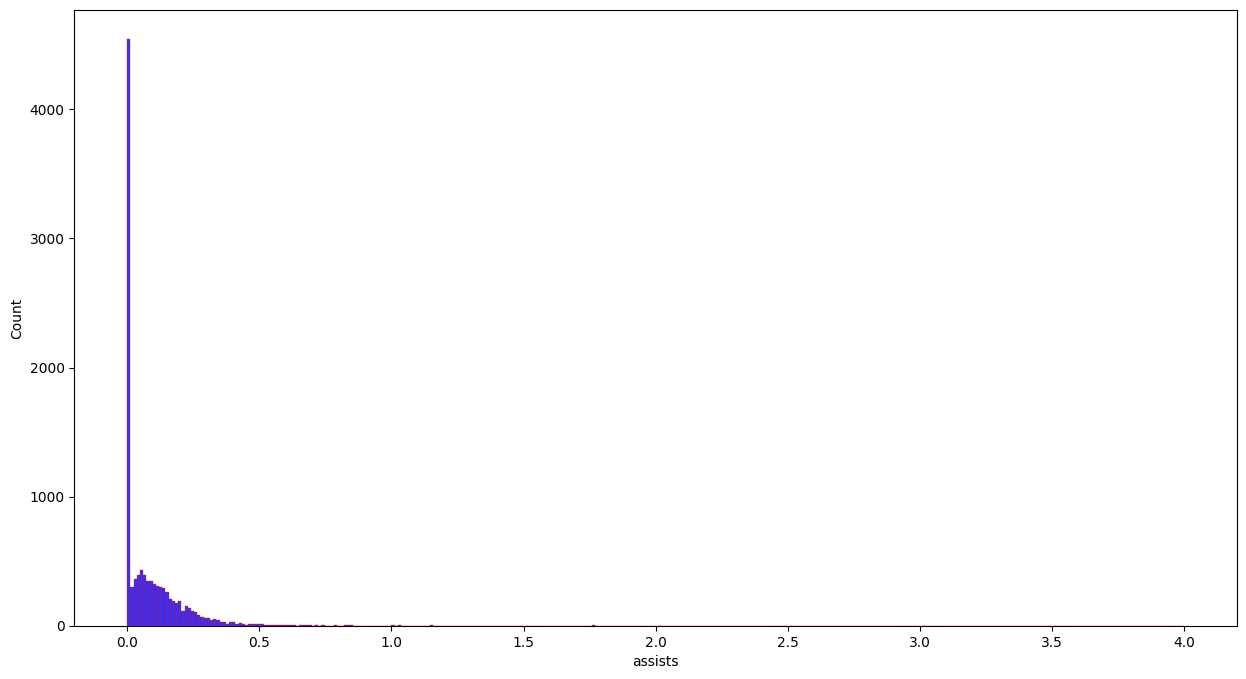

In [49]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='assists',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

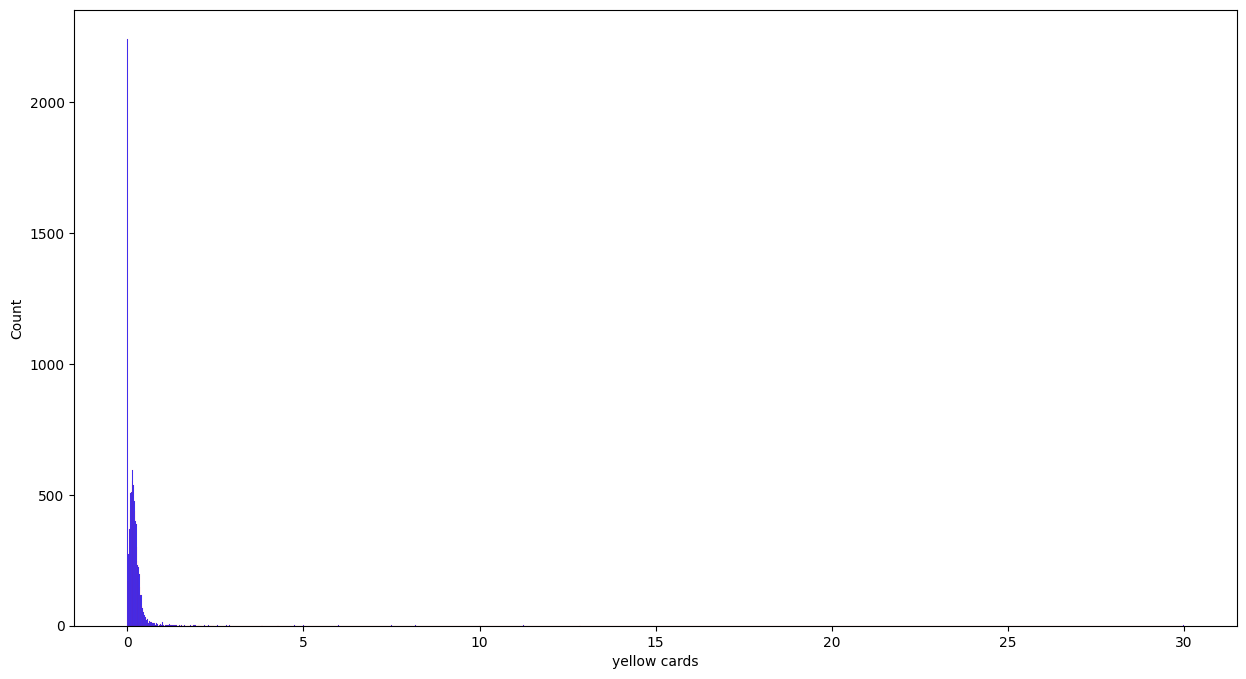

In [50]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='yellow cards',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

In [ ]:
# Compute Z-scores for the "appearance" column
df_Football_Players["y_z_score"] = stats.zscore(df_Football_Players["yellow cards"])

# Identify outliers (|Z| > 3)
df_Football_Players[df_Football_Players["y_z_score"].abs() > 3].sort_values('yellow cards')

In [51]:
df_Football_Players[df_Football_Players['yellow cards']>20]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,g_z_score
8176,/ijiel-protti/profil/spieler/376852,Club Atlético Tigre,Ijiel Protti,Attack Centre-Forward,174.0,28.0,1,0.0,0.0,30.0,...,0.0,3,237,30,0,525000,700000,4,0,-0.532971


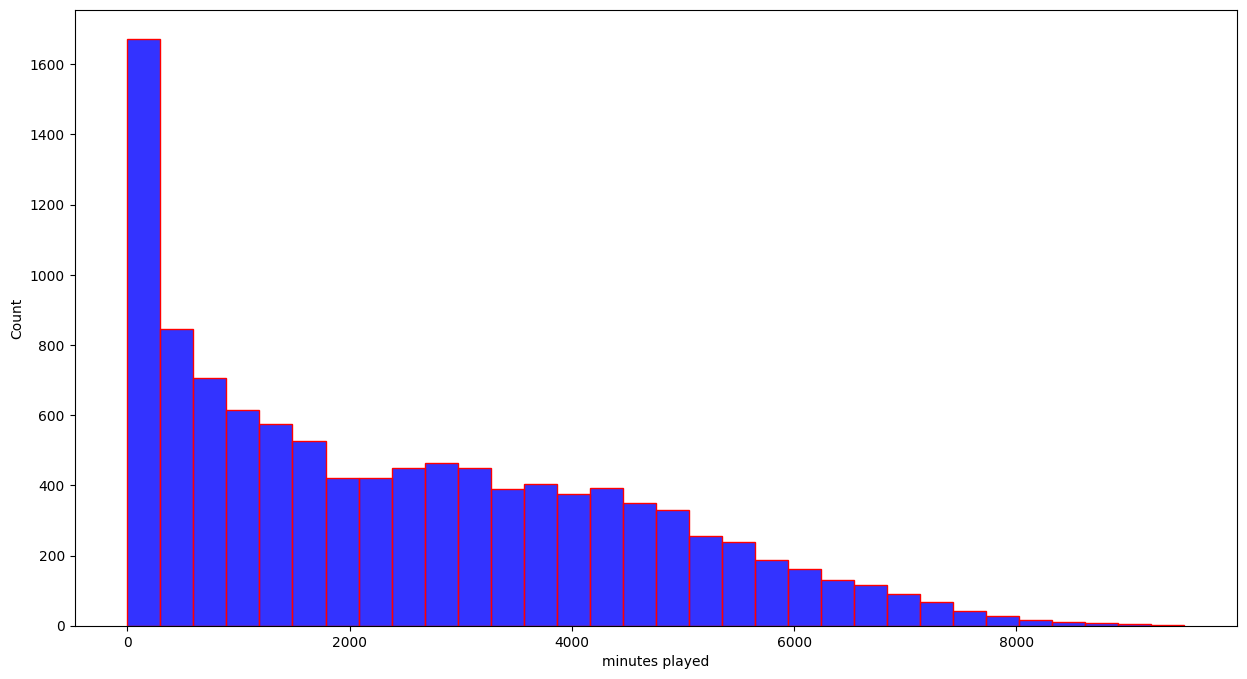

In [54]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='minutes played',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

In [60]:
# Compute Z-scores for the "appearance" column
df_Football_Players["m_z_score"] = stats.zscore(df_Football_Players["minutes played"])

# Identify outliers (|Z| > 3)
df_Football_Players[df_Football_Players["m_z_score"].abs() > 3][['name','minutes played']].sort_values('minutes played')

,name,minutes played
501,Harry Kane,8552
42,Declan Rice,8570
431,Ederson,8697
1506,Éder Militão,8726
2110,Alexander Nübel,8820
4286,Alejandro Grimaldo,8841
5738,John Egan,8845
1508,Antonio Rüdiger,8860
5567,Max Power,8878
5692,Josh Cullen,8884


In [61]:
del df_Football_Players['m_z_score']

- II checked the data source and the values ​​are correct ✅

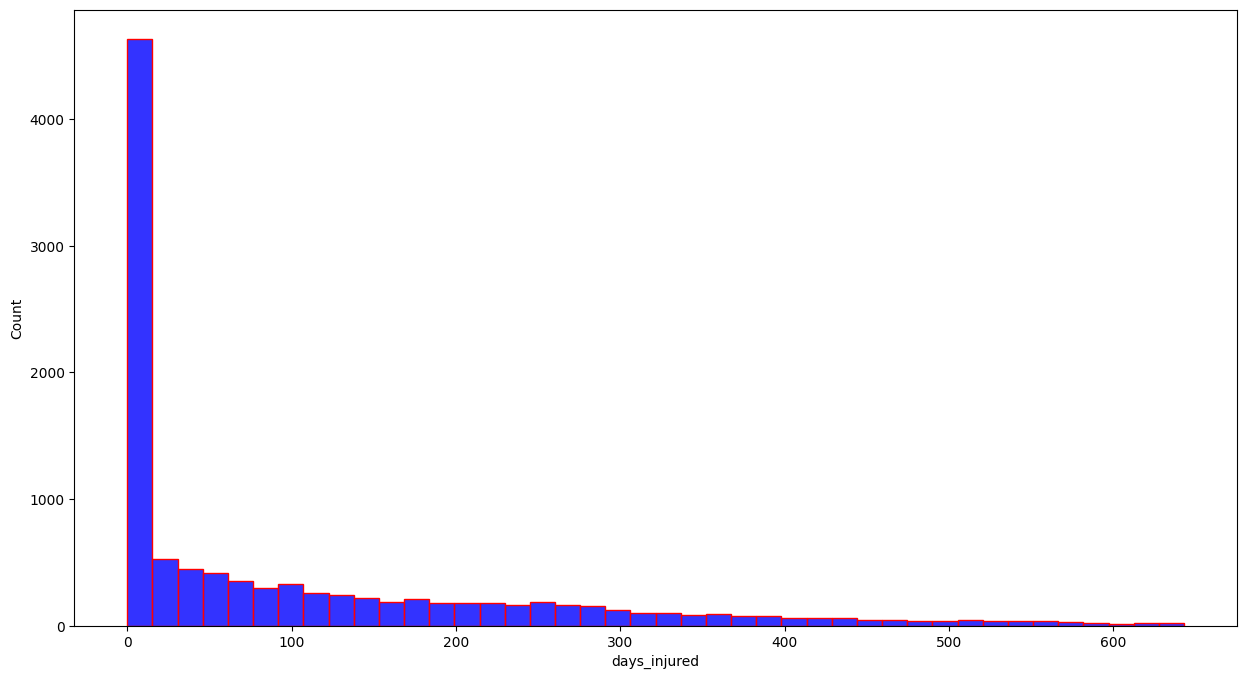

In [77]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='days_injured',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

In [ ]:
# Compute Z-scores for the "days_injured" column
df_Football_Players["d_z_score"] = stats.zscore(df_Football_Players["days_injured"])

# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

df_Football_Players[df_Football_Players["d_z_score"].abs() > 3][['player','team','name','position','height','age','appearance','days_injured']].sort_values('days_injured')




,player,team,name,position,height,age,appearance,days_injured
7111,/kacper-przybylko/profil/spieler/86030,Chicago Fire FC,Kacper Przybylko,Attack Centre-Forward,192.0,30.0,15,645
2835,/robbin-ruiter/profil/spieler/81775,SC Cambuur Leeuwarden,Robbin Ruiter,Goalkeeper,196.0,36.0,18,645
8403,/warner-hahn/profil/spieler/111180,Kyoto Sanga,Warner Hahn,Goalkeeper,190.0,30.0,25,645
7520,/lautaro-giannetti/profil/spieler/225963,CA Vélez Sarsfield,Lautaro Giannetti,Defender Centre-Back,185.0,29.0,11,647
133,/alex-mccarthy/profil/spieler/95976,Southampton FC,Alex McCarthy,Goalkeeper,193.0,33.0,29,647
...,...,...,...,...,...,...,...,...
5266,/greg-cunningham/profil/spieler/114093,Preston North End,Greg Cunningham,Defender Left-Back,183.0,32.0,50,1365
2718,/marco-van-ginkel/profil/spieler/147034,Vitesse Arnhem,Marco van Ginkel,midfield-CentralMidfield,186.0,30.0,55,1456
8361,/ryo-miyaichi/profil/spieler/129688,Yokohama F. Marinos,Ryo Miyaichi,Attack-RightWinger,181.0,30.0,7,1555
542,/mamadou-doucoure/profil/spieler/340480,Borussia Mönchengladbach,Mamadou Doucouré,Defender Centre-Back,183.0,25.0,14,1570


In [79]:
# I assume this is outliers so i will drop it from the dataset
indexs = df_Football_Players[df_Football_Players["d_z_score"].abs() > 3].index
df_Football_Players.drop(indexs,inplace=True)
del df_Football_Players["d_z_score"]


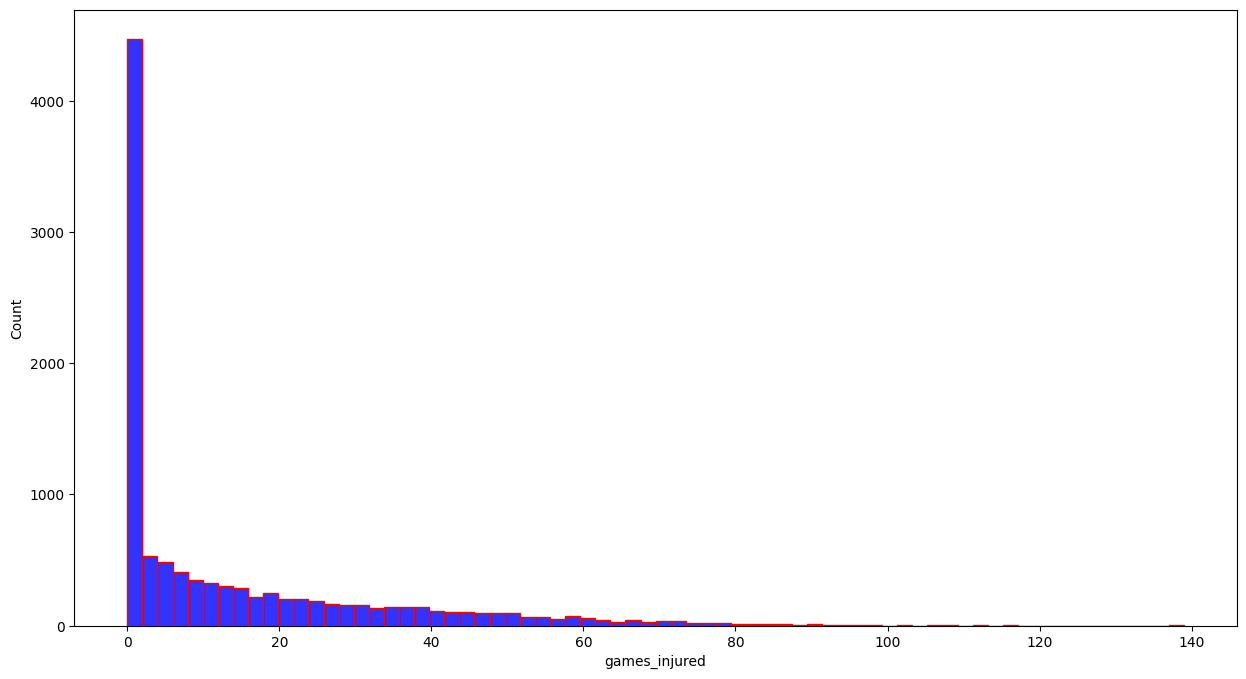

In [78]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='games_injured',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

In [81]:
# Compute Z-scores for the "days_injured" column
df_Football_Players["g_z_score"] = stats.zscore(df_Football_Players["games_injured"])

# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

df_Football_Players[df_Football_Players["g_z_score"].abs() > 3][['player','team','name','position','height','age','appearance','days_injured','games_injured']].sort_values('games_injured')




,player,team,name,position,height,age,appearance,days_injured,games_injured
6286,/nazim-sangare/profil/spieler/157113,Fenerbahce,Nazim Sangaré,Defender Right-Back,185.0,29.0,29,434,73
2554,/ismaily/profil/spieler/124028,LOSC Lille,Ismaily,Defender Left-Back,177.0,33.0,46,509,73
1840,/mattia-caldara/profil/spieler/197470,Spezia Calcio,Mattia Caldara,Defender Centre-Back,187.0,29.0,55,478,73
388,/naby-keita/profil/spieler/302215,Liverpool FC,Naby Keïta,midfield-CentralMidfield,172.0,28.0,53,376,73
897,/timothy-chandler/profil/spieler/49723,Eintracht Frankfurt,Timothy Chandler,Defender Right-Back,186.0,33.0,30,526,73
...,...,...,...,...,...,...,...,...,...
9896,/chung-yong-lee/profil/spieler/81801,Ulsan Hyundai,Chung-yong Lee,Attack-RightWinger,180.0,34.0,21,623,109
3433,/boschilia/profil/spieler/288496,Coritiba Foot Ball Club,Boschilia,midfield-AttackingMidfield,173.0,27.0,7,637,112
1938,/marco-benassi/profil/spieler/201040,US Cremonese,Marco Benassi,midfield-CentralMidfield,184.0,28.0,40,426,113
355,/rico-henry/profil/spieler/339556,Brentford FC,Rico Henry,Defender Left-Back,170.0,25.0,76,608,117


In [82]:
df_Football_Players[df_Football_Players['days_injured']>434]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,g_z_score,y_z_score
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1304,510,58,1,1500000,22000000,1,0,2.249807,-0.279250
9,/luke-shaw/profil/spieler/183288,Manchester United,Luke Shaw,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,...,5854,443,70,4,35000000,42000000,2,1,2.864298,0.378953
33,/lukasz-fabianski/profil/spieler/29692,West Ham United,Lukasz Fabianski,Goalkeeper,190.0,38.0,75,0.000000,0.000000,0.040767,...,6623,554,99,4,1000000,9000000,1,0,4.349320,-0.344591
35,/kurt-zouma/profil/spieler/157509,West Ham United,Kurt Zouma,Defender Centre-Back,190.0,28.0,65,0.050056,0.016685,0.033370,...,5394,624,68,9,28000000,35000000,2,0,2.761883,-0.361699
47,/manuel-lanzini/profil/spieler/135853,West Ham United,Manuel Lanzini,midfield-AttackingMidfield,167.0,30.0,69,0.220103,0.110051,0.176082,...,4089,555,72,3,8000000,20000000,3,0,2.966714,-0.031628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10532,/salim-khelifi/profil/spieler/147049,Perth Glory,Salim Khelifi,midfield-RightMidfield,172.0,29.0,22,0.335821,0.067164,0.067164,...,1340,508,60,1,300000,1500000,3,1,2.352222,-0.283539
10536,/adrian-sardinero/profil/spieler/125870,Perth Glory,Adrián Sardinero,Attack-LeftWinger,175.0,32.0,16,0.000000,0.101351,0.000000,...,888,500,39,0,100000,750000,4,1,1.276862,-0.438879
10563,/daniel-arzani/profil/spieler/399997,Macarthur FC,Daniel Arzani,Attack-LeftWinger,175.0,24.0,39,0.201162,0.321860,0.362092,...,2237,524,87,3,450000,1500000,4,1,3.734828,0.398584
10662,/valon-berisha/profil/spieler/145115,Melbourne City FC,Valon Berisha,midfield-CentralMidfield,176.0,30.0,44,0.031612,0.252898,0.094837,...,2847,548,77,14,1800000,10000000,3,0,3.222752,-0.219537


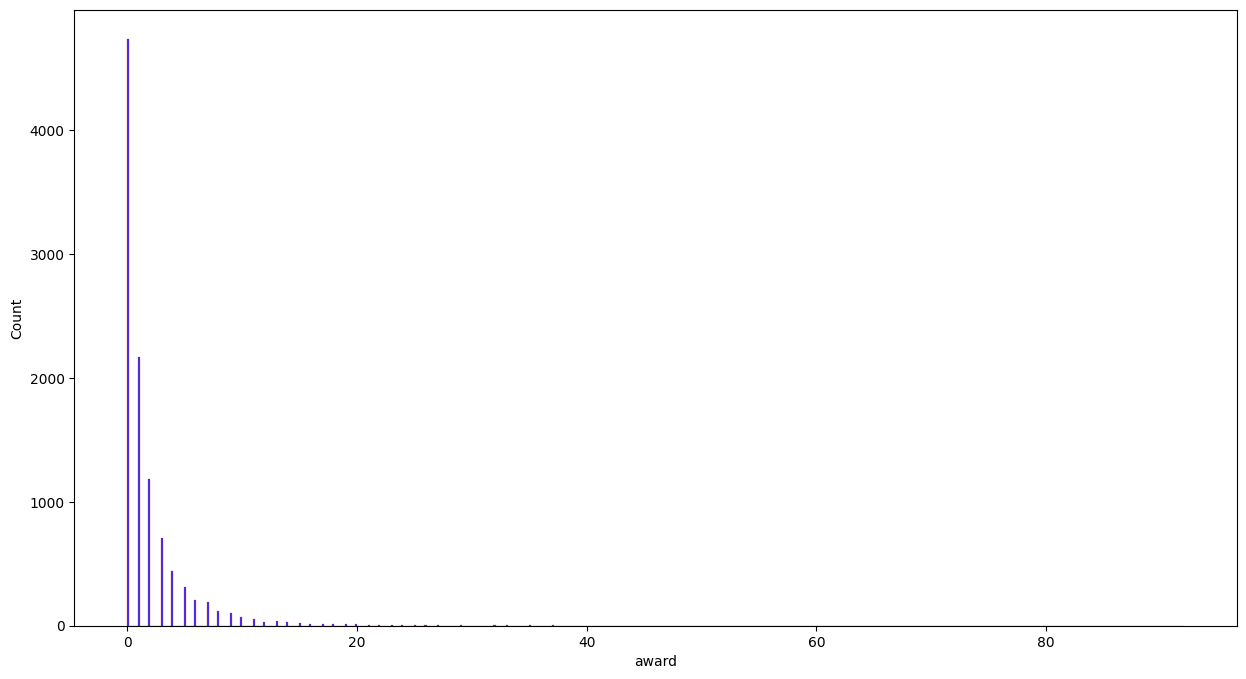

In [83]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='award',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

In [ ]:
# Compute Z-scores for the "award" column
df_Football_Players["a_z_score"] = stats.zscore(df_Football_Players["award"])

# Identify outliers (|Z| > 3)

df_Football_Players[df_Football_Players["a_z_score"].abs() > 3][['player','team','name','award','position','height','age','appearance','days_injured','games_injured']].sort_values('award')



,player,team,name,award,position,height,age,appearance,days_injured,games_injured
10662,/valon-berisha/profil/spieler/145115,Melbourne City FC,Valon Berisha,14,midfield-CentralMidfield,176.0,30.0,44,548,77
5819,/stefano-denswil/profil/spieler/182923,Trabzonspor,Stefano Denswil,14,Defender Centre-Back,188.0,30.0,57,184,29
1479,/munir-el-haddadi/profil/spieler/223725,Getafe CF,Munir El Haddadi,14,Attack Centre-Forward,175.0,27.0,56,18,4
2554,/ismaily/profil/spieler/124028,LOSC Lille,Ismaily,14,Defender Left-Back,177.0,33.0,46,509,73
843,/cristian-gamboa/profil/spieler/121686,VfL Bochum,Cristian Gamboa,14,Defender Right-Back,175.0,33.0,48,271,33
...,...,...,...,...,...,...,...,...,...,...
1507,/david-alaba/profil/spieler/59016,Real Madrid,David Alaba,43,Defender Centre-Back,180.0,30.0,85,123,26
1525,/karim-benzema/profil/spieler/18922,Real Madrid,Karim Benzema,53,Attack Centre-Forward,185.0,35.0,89,156,26
1549,/robert-lewandowski/profil/spieler/38253,FC Barcelona,Robert Lewandowski,65,Attack Centre-Forward,185.0,34.0,92,139,22
9433,/cristiano-ronaldo/profil/spieler/8198,Al-Nassr FC,Cristiano Ronaldo,90,Attack Centre-Forward,187.0,38.0,74,168,27


- After checking the source, it turned out to be normal✅

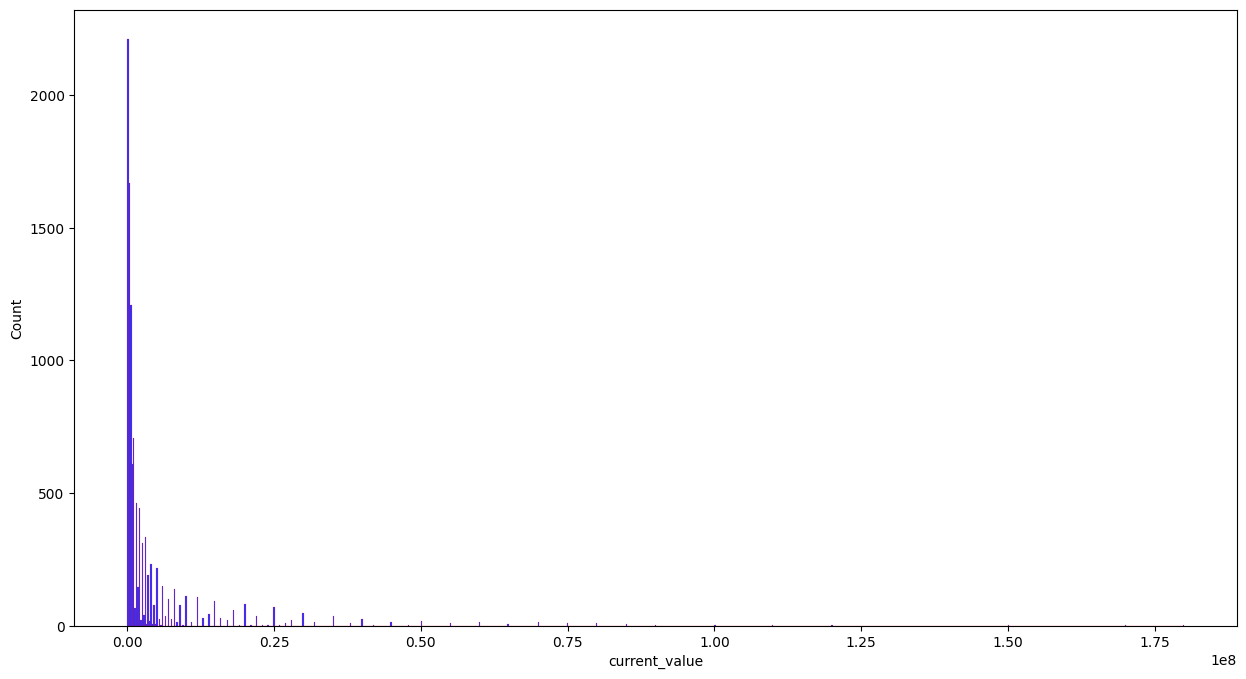

In [85]:
plt.figure(figsize=(15,8))
sns.histplot(
    df_Football_Players,
    x='current_value',
    multiple="stack", # also can be layer or dodge or fill
    edgecolor = 'red',
    color='blue',
    alpha=0.8);

In [86]:
# Compute Z-scores for the "current_value" column
df_Football_Players["a_z_score"] = stats.zscore(df_Football_Players["current_value"])

# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

df_Football_Players[df_Football_Players["a_z_score"].abs() > 3][['player','team','name','current_value','position','height','age','appearance','days_injured','games_injured']].sort_values('current_value')


,player,team,name,current_value,position,height,age,appearance,days_injured,games_injured
5731,/joao-pedro/profil/spieler/626724,Watford FC,João Pedro,32000000,Attack Centre-Forward,182.0,21.0,64,74,15
69,/wilfred-ndidi/profil/spieler/274839,Leicester City,Wilfred Ndidi,32000000,midfield-DefensiveMidfield,183.0,26.0,61,234,44
96,/jacob-ramsey/profil/spieler/503749,Aston Villa,Jacob Ramsey,32000000,midfield-CentralMidfield,180.0,22.0,73,46,4
162,/robert-sanchez/profil/spieler/403151,Brighton &amp; Hove Albion,Robert Sánchez,32000000,Goalkeeper,197.0,25.0,63,0,0
887,/evan-ndicka/profil/spieler/371149,Eintracht Frankfurt,Evan Ndicka,32000000,Defender Centre-Back,192.0,23.0,88,89,11
...,...,...,...,...,...,...,...,...,...,...
1017,/jamal-musiala/profil/spieler/580195,Bayern Munich,Jamal Musiala,110000000,midfield-AttackingMidfield,184.0,20.0,87,66,6
960,/jude-bellingham/profil/spieler/581678,Borussia Dortmund,Jude Bellingham,120000000,midfield-CentralMidfield,186.0,19.0,86,19,4
1521,/vinicius-junior/profil/spieler/371998,Real Madrid,Vinicius Junior,150000000,Attack-LeftWinger,176.0,22.0,107,70,12
453,/erling-haaland/profil/spieler/418560,Manchester City,Erling Haaland,170000000,Attack Centre-Forward,195.0,22.0,83,204,36


- After checking the source, it turned out to be normal✅

In [87]:
# Compute Z-scores for the "highest_value" column
df_Football_Players["a_z_score"] = stats.zscore(df_Football_Players["highest_value"])

# Identify outliers (|Z| > 3)
# I assume this is outliers so i will drop it from the dataset

df_Football_Players[df_Football_Players["a_z_score"].abs() > 3][['player','team','name','highest_value','position','height','age','appearance','days_injured','games_injured']].sort_values('highest_value')


,player,team,name,highest_value,position,height,age,appearance,days_injured,games_injured
3631,/hulk/profil/spieler/80562,Clube Atlético Mineiro,Hulk,48000000,Attack Centre-Forward,180.0,36.0,7,216,31
1046,/dani-olmo/profil/spieler/293385,RB Leipzig,Dani Olmo,50000000,midfield-AttackingMidfield,179.0,25.0,62,179,36
498,/arnaut-danjuma/profil/spieler/355861,Tottenham Hotspur,Arnaut Danjuma,50000000,Attack-LeftWinger,178.0,26.0,63,558,86
2002,/min-jae-kim/profil/spieler/503482,SSC Napoli,Min-jae Kim,50000000,Defender Centre-Back,182.0,26.0,85,203,17
492,/rodrigo-bentancur/profil/spieler/354362,Tottenham Hotspur,Rodrigo Bentancur,50000000,midfield-CentralMidfield,187.0,25.0,70,338,40
...,...,...,...,...,...,...,...,...,...,...
527,/raheem-sterling/profil/spieler/134425,Chelsea FC,Raheem Sterling,160000000,Attack-LeftWinger,170.0,28.0,85,284,34
453,/erling-haaland/profil/spieler/418560,Manchester City,Erling Haaland,170000000,Attack Centre-Forward,195.0,22.0,83,204,36
2642,/neymar/profil/spieler/68290,Paris Saint-Germain,Neymar,180000000,Attack-LeftWinger,175.0,31.0,57,419,67
2643,/lionel-messi/profil/spieler/28003,Paris Saint-Germain,Lionel Messi,180000000,Attack-RightWinger,170.0,35.0,75,167,30


- After checking the source, it turned out to be normal✅

In [ ]:
del df_Football_Players['a_z_score']
del df_Football_Players['y_z_score']
del df_Football_Players['g_z_score']

In [24]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [25]:
# go to delete ouliers

## 2. Feature engineering: 

- Feature scaling
- Aggregation
- One hot coding

-------------------



In [ ]:
df_Football_Players = df_Football_Players.drop(['name','player'],axis=1)

In [117]:
categorical_features = df_Football_Players.select_dtypes(include=object).columns
numeric_features = df_Football_Players.select_dtypes(include=np.number).columns
categorical_features

Index(['team', 'position'], dtype='object')

In [118]:
for i in categorical_features:
   print (df_Football_Players[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    45
FC Seoul                  43
Gangwon FC                42
Daegu FC                  42
                          ..
FC Barcelona              21
Swansea City              21
West Ham United           20
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1771
Attack Centre-Forward         1316
Goalkeeper                    1206
midfield-CentralMidfield      1130
midfield-DefensiveMidfield     881
Defender Right-Back            852
Defender Left-Back             788
midfield-AttackingMidfield     760
Attack-RightWinger             705
Attack-LeftWinger              703
midfield-RightMidfield         101
midfield-LeftMidfield           99
midfield                        75
Attack-SecondStriker            64
Attack                          53
Defender                        33
Name: count, dtype: int64


In [119]:
# one hot coding for categorical_features
df_Football_Players = pd.get_dummies(df_Football_Players,columns=categorical_features)


In [120]:
df_Football_Players.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0000,0.0,1.217252,0.335463,...,False,False,False,True,False,False,False,False,False,False
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0000,0.0,1.242331,0.207055,...,False,False,False,True,False,False,False,False,False,False
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.0,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,False
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.0,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,False
5,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,False


In [121]:
df_Football_Players.shape

(10537, 408)

#### 3. Feature selection


In [135]:
correlation = df_Football_Players.corr()
correlation[abs(correlation['current_value']) > 0.17]['current_value'].sort_values(ascending=False)

current_value           1.000000
highest_value           0.837063
minutes played          0.421619
appearance              0.420535
award                   0.304447
team_Manchester City    0.215586
team_Arsenal FC         0.179663
team_Bayern Munich      0.177779
team_Real Madrid        0.170844
Name: current_value, dtype: float64

In [139]:
# Set the correlation threshold
threshold = 0.17  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'award', 'current_value',
       'highest_value', 'team_Arsenal FC', 'team_Bayern Munich',
       'team_Manchester City', 'team_Real Madrid'],
      dtype='object')

In [140]:
df_Football_Players = df_Football_Players[selected_features]
df_Football_Players.head()

,appearance,minutes played,award,current_value,highest_value,team_Arsenal FC,team_Bayern Munich,team_Manchester City,team_Real Madrid
0,104,9390,13,15000000,70000000,False,False,False,False
1,15,1304,1,1500000,22000000,False,False,False,False
3,82,6408,9,50000000,50000000,False,False,False,False
4,63,5031,21,40000000,80000000,False,False,False,False
5,68,4762,1,25000000,70000000,False,False,False,False


In [141]:
df_Football_Players.shape

(10537, 9)

#### 4. Prepare train and test data


In [142]:
# Prepare data
X = df_Football_Players.drop(['current_value'], axis=1)
y = df_Football_Players['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=99)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [143]:
X.shape

(10537, 8)

In [144]:
y.shape

(10537,)

In [ ]:
# build the model
model = LinearRegression()


In [146]:
# Train the Model
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [147]:
# Test the Model
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)      # Linear regression model

In [148]:
# Interpretation of the Model
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])   # Linear model cofficients


In [149]:
coeff_df

,Coefficient
appearance,-1.076829e+06
minutes played,1.988845e+06
award,-1.959024e+06
highest_value,8.297553e+06
team_Arsenal FC,5.816925e+05
team_Bayern Munich,5.872162e+05
team_Manchester City,7.068136e+05
team_Real Madrid,3.071301e+05


In [150]:
print(f" Linear regression intercept: {model.intercept_}") 


 Linear regression intercept: 3760325.068216871


#### Evaluating the Model


##### Mean Square Error

In [ ]:
# Mean Square Error
y_base = [y_train.mean()] * len(y_test)
y_base


In [155]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 5.421743e+13


In [156]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error for training: 2.250287e+13
Mean Squared Error for testing: 1.393053e+13



##### Mean Absolute Error


In [157]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 4.069883e+06


In [158]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 2.123172e+06
Mean Absolute Error for testing: 1.881380e+06


##### Root Mean Squared Error


In [159]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 7.363249e+06


In [160]:
# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')

Root Mean Squared Error for training: 4.743719e+06
Root Mean Squared Error for testing: 3.732362e+06


##### R Square


In [161]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7516816177999046
R Square for testing: 0.7410937220057816


#### Predictions vs. Real Values


In [163]:
predictions = model.predict(X_test_scaled)
predictions

array([-930430.02006853, 4550353.05916408,  478245.96757708, ...,
        424522.71995247,  743995.31189655,  773812.20341119])

In [166]:
Real_Values = np.array(y_test)
Real_Values

array([  125000, 14000000,   500000, ...,   400000,   400000,   500000],
      dtype=int64)

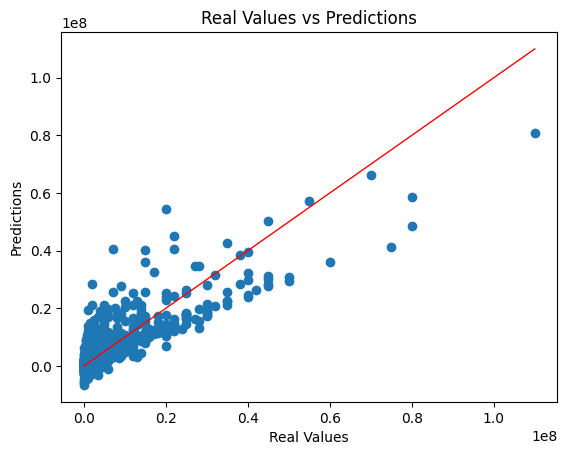

In [167]:
plt.scatter(Real_Values, predictions)
plt.plot([Real_Values.min(), Real_Values.max()], [Real_Values.min(), Real_Values.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions')
plt.show()

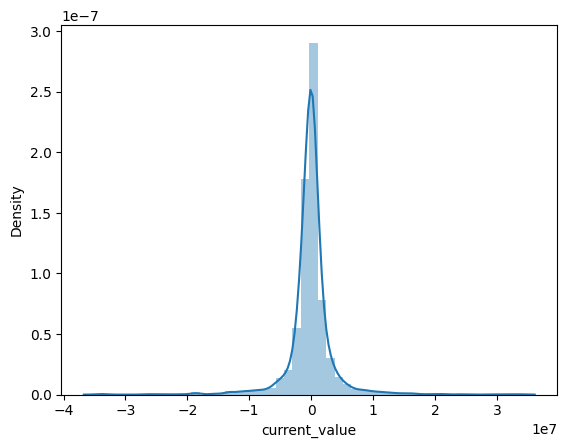

In [168]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution
